In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
data = np.loadtxt('logistic_regression_data.csv', delimiter=',', skiprows=1, dtype = np.float64)
X, y = data[:, :-1], data[:, -1].reshape((-1, 1))

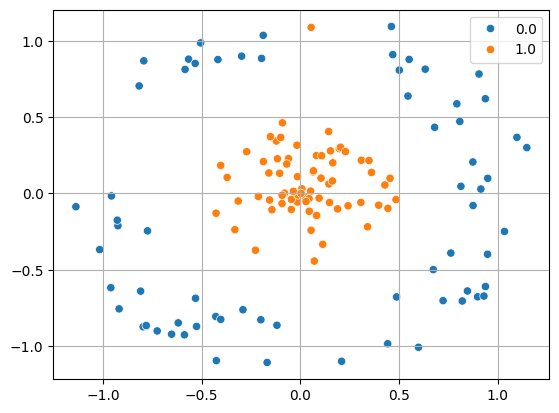

In [87]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y.flatten())
plt.grid()
plt.show()

In [88]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [89]:
#Generate loss function
def loss(w, X, y):
    y_hat = sigmoid(np.dot(X, w))
    loss = -np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)) / len(y)
    return loss

In [90]:
#Gradient
def grad(w, X, y):
    y_hat = sigmoid(np.dot(X, w))
    gradient = np.dot(X.T, (y_hat - y)) / len(y)
    return gradient

In [91]:
#Feature transformation
def feature_transformation(x1, x2, power=2):
    new_x = np.ones((x1.shape[0], 1))
    for i in range(1, power + 1):
        for j in range(i + 1):
            new_x = np.append(new_x, (x1**(i-j)*(x2**j)).reshape((-1,1)), axis = 1)
    return new_x

In [92]:
def predict(w, X):
    y_hat = (sigmoid(np.dot(X, w)) > 0.5).flatten()
    #return np.where(y_hat >= 0.5, 1, 0)
    return y_hat

In [93]:
#Gradient descent function
def gradient_descent(X, y, w, alpha, num_iterations):
    losses = []
    for _ in range(num_iterations):
        w -= alpha * grad(w, X, y)
        losses.append(loss(w, X, y))
    return w, losses

In [94]:
#Implementing the logistic regression model
def logistic_regression(X, y, power=2, alpha=0.01, num_iterations=100):
    X = feature_transformation(X[:, 0], X[:, 1], power)
    w = np.zeros((X.shape[1], 1), dtype=np.float64)
    w, losses = gradient_descent(X, y, w, alpha, num_iterations)
    prediction = predict(w, X)
    return prediction, losses, w

The accuracy of the model is:  100.0 %


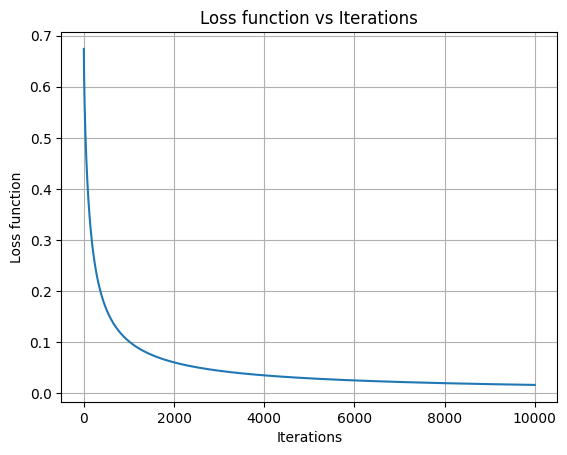

In [95]:
power = 20
prediction, losses, w = logistic_regression(X, y, power=power, alpha=0.1, num_iterations=10000)
print("The accuracy of the model is: ", np.mean(prediction == y.flatten()) * 100, "%")
plt.plot(losses)
plt.title("Loss function vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss function")
plt.grid()
plt.show()

C:\Users\97156\AppData\Local\Temp\ipykernel_16508\2181701318.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = np.dot(feature_transformation(u[i].reshape((-1, 1)), v[j].reshape((-1, 1)), power=power), w)


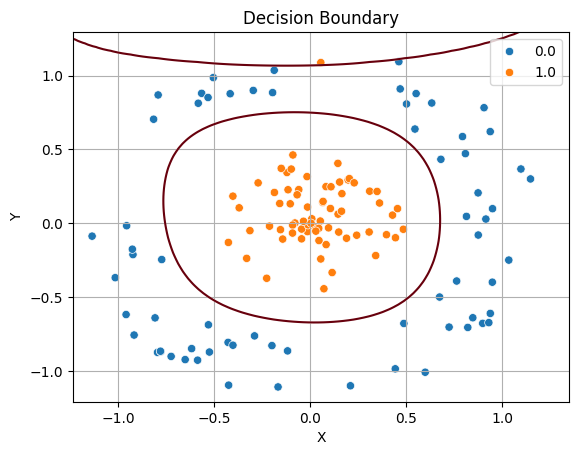

In [96]:
u = np.linspace(min(X[:, 0])-0.1, max(X[:, 0])+0.2, 100)
v = np.linspace(min(X[:, 1])-0.1, max(X[:, 1])+0.2, 100)

z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = np.dot(feature_transformation(u[i].reshape((-1, 1)), v[j].reshape((-1, 1)), power=power), w)
z = z.T

plt.contour(u, v, z, [0,0.01], cmap = "Reds")
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y.flatten())
plt.title("Decision Boundary")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

Regularised Version

In [97]:
def loss_reg(w, X, y, lambda_):
    y_hat = sigmoid(np.dot(X, w))
    b = w.copy()
    b[0] = 0
    # Regularization term (L2 regularization)
    loss = -np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)) / len(y) + (lambda_ * np.sum(b**2))/len(y)
    return loss

In [98]:
def grad_reg(w, X, y, lambda_):
    y_hat = sigmoid(np.dot(X, w))
    b = w.copy()
    b[0] = 0
    # Gradient with regularization term
    gradient = np.dot(X.T, (y_hat - y)) / len(y) + (2 * lambda_ * b) / len(y)#(2.lam.b)/n
    return gradient


In [99]:
#Gradient descent function with regularization
def gradient_descent_reg(X, y, w, alpha, lambda_ = 0, num_iterations = 100):
    losses = []
    for _ in range(num_iterations):
        w -= alpha * grad_reg(w, X, y, lambda_)
        losses.append(loss_reg(w, X, y, lambda_))
    return w, losses

In [100]:
#Implementing the logistic regression model with regularization
def logistic_regression_reg(X, y, power=2, alpha=0.01, num_iterations=100, lambda_=0.1):
    X = feature_transformation(X[:, 0], X[:, 1], power)
    w = np.zeros((X.shape[1], 1), dtype=np.float64)
    w, losses = gradient_descent_reg(X, y, w, alpha, lambda_, num_iterations)
    prediction = predict(w, X)
    return prediction, losses, w

The accuracy of the model is:  99.27536231884058 %


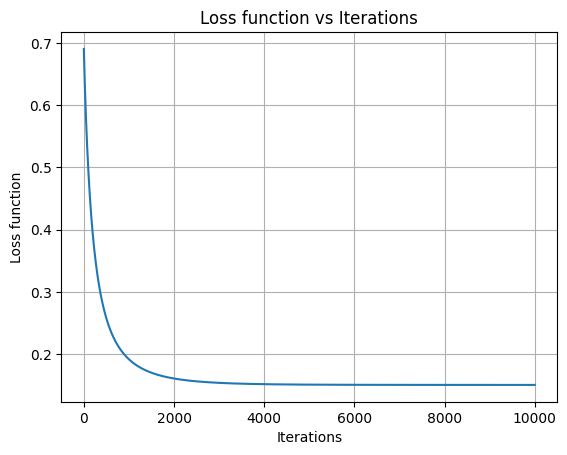

In [101]:
power = 2
lam = 0.1
prediction, losses, w = logistic_regression_reg(X, y, power=power, alpha=0.1, num_iterations=10000, lambda_=lam)
print("The accuracy of the model is: ", np.sum(prediction == y.flatten())/len(y) * 100, "%")
plt.plot(losses)
plt.title("Loss function vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss function")
plt.grid()
plt.show()

C:\Users\97156\AppData\Local\Temp\ipykernel_16508\871185617.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = np.dot(feature_transformation(u[i].reshape((-1, 1)), v[j].reshape((-1, 1)), power=power), w)


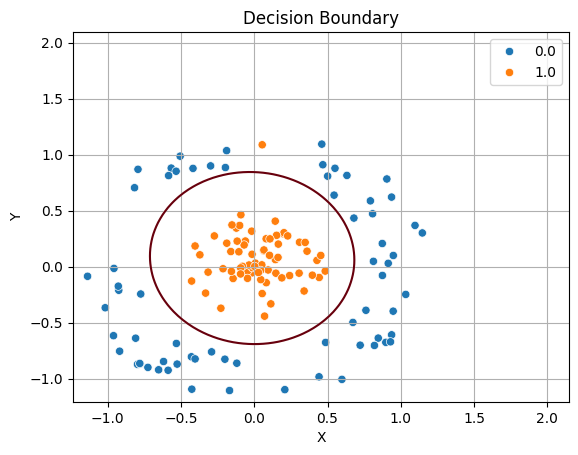

In [102]:
u = np.linspace(min(X[:, 0])-0.1, max(X[:, 0])+1, 100)
v = np.linspace(min(X[:, 1])-0.1, max(X[:, 1])+1, 100)

z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = np.dot(feature_transformation(u[i].reshape((-1, 1)), v[j].reshape((-1, 1)), power=power), w)
z = z.T

plt.contour(u, v, z, [0,0.01], cmap = "Reds")
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y.flatten())
plt.title("Decision Boundary")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

Conclusions:

Lambda brings a curve circle shape that is centered at the most concentrated point of the data. 
The more lambda increases, the more the circle shape is pronounced. The less lambda decreases, the more the circle shape is flattened. 
The model is not able to learn the data well when lambda is too high or too low. The best value of lambda is 0.1 in this case.
Also it helps to remove noise generally with increase, but it prioritises minimising the reg. factor taking a hit on loss function.

As power increase, the model tries to overfit the data.
The more power increases, the more the model tries to learn the data. The less power decreases, the more the model tries to generalize the data.
Also it leads to huge computational time.

Iterations helps in reducing the loss function.
The more iterations increase, the more the model tries to learn the data. The less iterations decrease, the more the model tries to generalize the data.

Learning rate if low, it will slow down the path to minima.
With high alpha, accuracy might become low.